In [208]:
from PIL import Image
from scipy.ndimage.filters import median_filter
import numpy as np
import os
import matplotlib.pyplot as plt

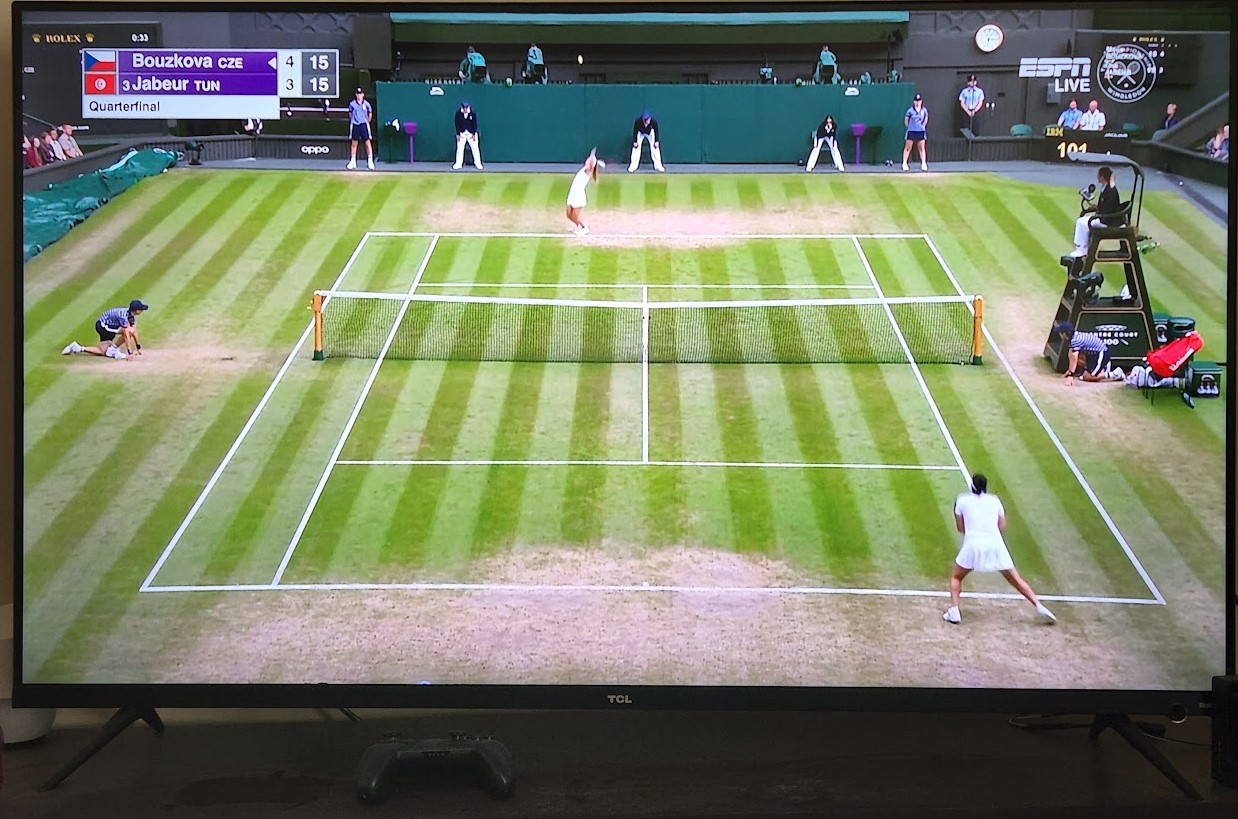

In [12]:
#read in image of Wimbledon match 

#Open image using Image module
im = Image.open("../Data/wimbledon.jpg")
#Show actual Image
im

In [21]:
#Observe the image shape
im_array = np.array(im)
im_array.shape

(819, 1238, 3)

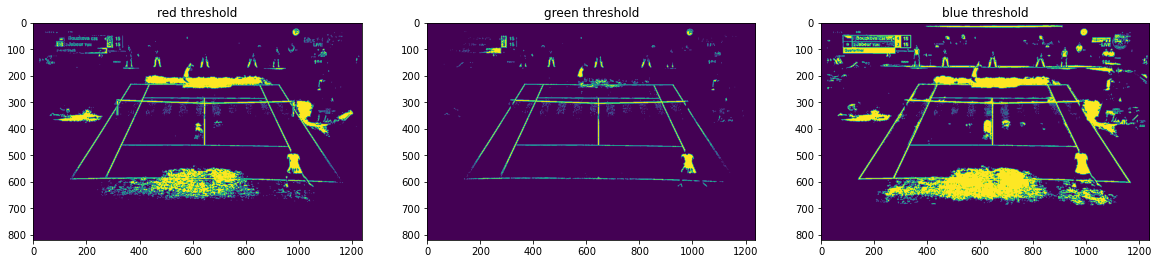

In [250]:
#Test out a couple thresholds and visualize which pixels are "True" or yellow
red_thresh = im_array[:,:,0] > 210
green_thresh = im_array[:,:,1] > 230
blue_thresh = im_array[:,:,2] > 175

# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

#Take and plot thresh, axis, and color
for thresh, ax, color in zip((red_thresh, green_thresh, blue_thresh), axs.ravel(), ['red','green','blue']):
    ax.imshow(thresh)
    ax.set_title("%s threshold" % (color))


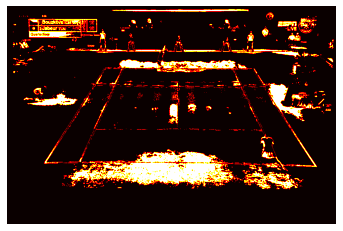

In [278]:
#Green appears to have the least dirt after thresholding
#Use the blue threshold as a mask to remove most of the court
masked_green = np.invert(green_thresh) * blue_thresh

#Create a heat map
plt.imshow(masked_green, cmap = 'hot')
plt.axis('off')
plt.show()

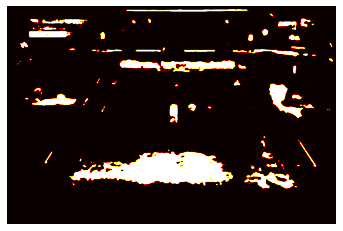

In [279]:
#Try to remove more of the court and players through filtering
filtered_image = median_filter(masked_green, size = (9,9))
plt.imshow(filtered_image, cmap = 'hot')
plt.axis('off')
plt.show()

In [355]:
im.size

(1238, 819)

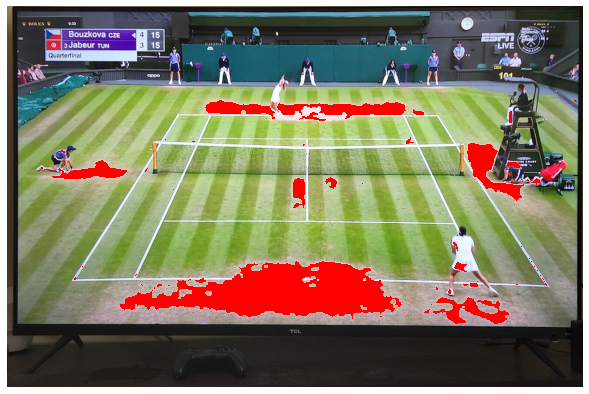

In [409]:
#lastly, filter out all values above a certain y value
filtered_image[:200,:] = 0


fig = plt.figure(frameon = False)
fig.set_size_inches(11, 7) #had to play with the size and the dpi below to get the original image and this one to match. Needs to be further refined vs brute force.

#Plot the base image
plt.imshow(im_array)

#Mask any value that isn't True or 1
filtered_image_masked = np.ma.masked_where(filtered_image.astype(int) == 0, filtered_image.astype(int))

#Hot only showed up as white, did rainbow to have color be red
plt.imshow(filtered_image_masked, cmap = 'rainbow_r')

plt.axis('off')
plt.savefig("../Data/heat_map.jpg", dpi = 155, bbox_inches='tight',pad_inches = 0)
plt.show()

In [476]:
#List of image gradients to append to the first image
image_gradient_list = []

#Set the image we are going to fade OUT FROM
base_image = Image.open('../Data/wimbledon.jpg')

#Append another base image to the list to focus on the court without the heatmap at the beginning
from itertools import repeat
image_gradient_list.extend(repeat(base_image,5))

#Number of Gradient images to generate
grad_slices = 46

#Across different gradients blend into the next image
for i in range(grad_slices):
    if i <= grad_slices/2:
        #Set the image we are going to fade IN TO
        fade_in_image = Image.open('../Data/heat_map.jpg')

        #Set the base image we fade FROM
        fade_out_image = Image.open('../Data/wimbledon.jpg')

        image_gradient_slice = Image.blend(fade_out_image, fade_in_image, i/(grad_slices/2))
        image_gradient_list.append(image_gradient_slice)
    else:
        #Set the image we are going to fade IN TO
        fade_out_image = Image.open('../Data/heat_map.jpg')

        #Set the base image we fade FROM
        fade_in_image = Image.open('../Data/wimbledon.jpg')

        image_gradient_slice = Image.blend(fade_out_image, fade_in_image, (i - (grad_slices/2))/(grad_slices/2))
        image_gradient_list.append(image_gradient_slice)

#append gradient image slices to the base wimbledon image
base_image.save('../Data/finished.gif', save_all=True, append_images=image_gradient_list, loop = 10)